<b>TUGAS BESAR VISUALISASI DATA </b>
<br>Nama Anggota :
1. Azka Zainur Azifa (1301194255)
2. Rianda Khusuma    (1301194432)
3. Shabrina Retno Ningsih (1301194162)

Topik Tubes yang kami ambil : Visualisasi Statistik Covid-19 yang ada di Indonesia </br>
Fokus kami terhadap analisa ini untuk mengetahui "New Case" kasus covid yang terdapat pada provinsi DKI Jakarta dan Jawa Barat

#Import Library dan Read Data

In [ ]:
import pandas as pd
import numpy as np

from bokeh.io import output_file, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool, GroupFilter,CDSView, DateRangeSlider, CustomJS,Dropdown
from bokeh.layouts import row, column, gridplot, layout
from bokeh.models.widgets import Tabs, Panel

from datetime import date

Data yang digunakan pada percobaan kali ini adalah covid_19_indonesia_time_series_all.csv yang didapatkan melalui Kaggle.com

In [ ]:
#Membaca Data
data = pd.read_csv('/content/covid_19_indonesia_time_series_all.csv', parse_dates=['Date'])
data

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,2020-03-02,ID-RI,Riau,1,0,0,1,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,2021-12-02,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,93,Province,NaN,Sulawesi Utara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,2021-12-02,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,92,Province,NaN,Sumatera Barat,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,2021-12-02,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,36,Province,NaN,Sumatera Selatan,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,2021-12-02,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,95,Province,NaN,Sumatera Utara,Indonesia,Asia,Sumatera,UTC+07:00,NaN,25,8.0,450,693.0,5417.0,72981,14874889,203.82,99.051964,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


Disini  kita menyeleksi data yang sekiranya akan terpakai dalam memvisualisasikan data covid 19

In [ ]:
#Select beberapa kolom yang diperlukan
data = data[['Date', 'Location', 'New Cases', 'New Deaths','New Recovered','New Active Cases','Total Cases'
,'Total Deaths','Total Recovered','Total Active Cases','Location Level','Province']]
data = data.rename(columns={'Total Cases': 'TotalCases','New Cases' : 'NewCases','Total Deaths' : 'TotalDeaths'})
data

,Date,Location,NewCases,New Deaths,New Recovered,New Active Cases,TotalCases,TotalDeaths,Total Recovered,Total Active Cases,Location Level,Province
0,2020-03-01,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,DKI Jakarta
1,2020-03-02,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,DKI Jakarta
2,2020-03-02,Indonesia,2,0,0,2,2,0,0,2,Country,NaN
3,2020-03-02,Riau,1,0,0,1,2,0,3,-1,Province,Riau
4,2020-03-03,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,DKI Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...
21754,2021-12-02,Sulawesi Utara,2,0,0,2,34715,1056,33566,93,Province,Sulawesi Utara
21755,2021-12-02,Sumatera Barat,4,0,0,4,89849,2152,87605,92,Province,Sumatera Barat
21756,2021-12-02,Sumatera Selatan,4,0,0,4,59937,3071,56830,36,Province,Sumatera Selatan
21757,2021-12-02,Sumatera Utara,4,0,1,3,106045,2889,103061,95,Province,Sumatera Utara


In [ ]:
output_notebook()

In [ ]:
# Mengambil Location DKI Jakarta dan Jawa Barat
newCase = (data[(data['Location'] == 'DKI Jakarta') | (data['Location'] == 'Jawa Barat') ]
               .loc[:, ['Date', 'Location', 'NewCases']]
               .sort_values(['Date']))
newCase.head(100)

,Date,Location,NewCases
0,2020-03-01,DKI Jakarta,2
1,2020-03-02,DKI Jakarta,2
4,2020-03-03,DKI Jakarta,2
6,2020-03-03,Jawa Barat,1
8,2020-03-04,DKI Jakarta,2
...,...,...,...
997,2020-04-18,Jawa Barat,11
1027,2020-04-19,DKI Jakarta,113
1032,2020-04-19,Jawa Barat,50
1067,2020-04-20,Jawa Barat,7


#Using the ColumnDataSource Object (Line Chart)

Setelah melakukan seleksi Location yang tertera pada data, mulailah untuk mencari tahu "New Case" covid yang terdapat pada provinsi DKI Jakarta dan juga Jawa Barat. 
<br>
<br>
Data akan divisualisasikan dengan 'line chart' untuk mengetahui banyak tidaknya kasus baru yang terdapat pada DKI jakarta dan Jawa Barat. visualisasi data ini dilengkapi oleh 'Slider date' untuk menyeleksi data berdasarkan tanggalnya.
<br>
selain itu, visualisasi data ini kami lengkapi dengan menggunakan menambahkan 'sidetools'.

In [ ]:
# Membuat File baru
output_file('newCase.html', 
            title='Kasus baru Covid di Indonesia pada Jakarta dan Jawa Barat')

# Mengisolasi data jakarta_data dan jabar_data
jakarta_data = newCase[newCase['Location'] == 'DKI Jakarta']
jabar_data = newCase[newCase['Location'] == 'Jawa Barat']

# Membuat ColumnDataSource objek untuk setiap team
jakarta_cds = ColumnDataSource(jakarta_data)
jabar_cds = ColumnDataSource(jabar_data)

# Specify the selection tools to be made available
select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'reset']


#membuat date slider
date_range_slider = DateRangeSlider(value=(date(2020, 3, 1), date(2021, 12, 3)),
                                    start=date(2020, 3, 1), end=date(2021, 12, 3))
date_range_slider.js_on_change("value", CustomJS(code="""
    console.log('date_range_slider: value=' + this.value, this.toString())
"""))

# Create and configure the figure
fig = figure(x_axis_type='datetime',
             plot_height=600, plot_width=800,
             title='Kasus baru Covid di Indonesia pada Jakarta dan Jawa Barat',
             x_axis_label='Date', y_axis_label='New Cases',
             toolbar_location='right')

# Render setiap data
fig.step('Date', 'NewCases', 
         color='#CE1141', legend_label='DKI Jakarta', 
         source=jakarta_cds)
fig.step('Date', 'NewCases', 
         color='#006BB6', legend_label='Jawa Barat', 
         source=jabar_cds)

# set penempatan label data
fig.legend.location = 'top_left'

# perlihatkan grafik
date_range_slider.js_link("value", fig.x_range, "start", attr_selector=0)
date_range_slider.js_link("value", fig.x_range, "end", attr_selector=1)
  
layout = layout([date_range_slider], [fig])
show(layout)

Maka dari itu didapatkanlah hasil dari kasus baru

#Plot Chart Adding Hover Actions

Dikarenakan kasus baru covid pada DKI Jakarta jauh lebih banyak dibandingkan Jawa Barat, disini kami ingin menampilkan visualisasi data covid pada DKI Jakarta. <br>
<br>
Kali ini kami menggunakan plot chart dan menambahkan hover tools untuk menampilkan informasi mengenai data yang sedang dipilih. Informasi yang akan disajikan berupa provinsi, jumlah kasus baru, total kasus dan juga total kematian berdasarkan tanggal yang tertera.

In [ ]:
newCase2 = (data[(data['Location'] == 'DKI Jakarta') | (data['Location'] == 'Jawa Barat') ]
               .loc[:, ['Date', 'Location', 'NewCases','Province','TotalCases','TotalDeaths']]
               .sort_values(['Date']))

# Isolasi data jakarta_data2
jakarta_data2 = newCase2[newCase2['Location'] == 'DKI Jakarta']

# Membuat ColumnDataSource objek
jakarta_cds2 = ColumnDataSource(jakarta_data2)

# File yang dioutputkan
output_file('NewCaseJKT.html',
            title='Plot kasus baru di Jakarta')


# Menspesifikasikan tools seleksi yang akan digunakan
select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'reset']

# Membuat figure
fig = figure(x_axis_type='datetime',
             plot_height=1000,
             plot_width=1200,
             x_axis_label='Date',
             y_axis_label='New Cases',
             title='Plot kasus baru di Jakarta',
             toolbar_location='below',
             tools=select_tools)

# Memnambahkan square representing 
fig.square(x='Date',
           y='NewCases',
           source=jakarta_cds2,
           color='royalblue',
           selection_color='deepskyblue',
           nonselection_color='lightgray',
           nonselection_alpha=0.3)

tooltips = [
            ('Province','@Province'),
            ('New Cases', '@NewCases'),
            ('Total Cases', '@TotalCases'),
            ('Total Deaths','@TotalDeaths'),
           ]

# Menambahkan HoverTool ke figure
fig.add_tools(HoverTool(tooltips=tooltips))

# Visualisasi
show(fig)


Telah didapatkan grafik persebaran data dalam pertanggalnya pada DKI Jakarta.
<br> 
 berikut adalah gambar ketika salah satu plot telah dipilih : 
<br>
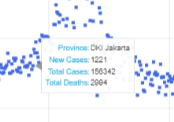

#Highlighting Data Using the Legend

Setelah melakukan visualisasi data menggunakan line dan plot chart, disini kami ingin menampilkan data dengan menambahkan interaksi pada label data. <br> 
<br> 
ketika anda menekan label data, maka data yang terkait akan tersembunyikan dan dihilangkan. ketika anda menekan label tersebut kembali, maka data yang terkait akan muncul kembali. <br> 
<br>
Hal itu memiliki keuntungan untuk anda yang ingin melihat data berdasarkan label data. 

In [ ]:
frames = [jakarta_data, jabar_data]
datasource = pd.concat(frames)
data_Source = ColumnDataSource(datasource)

In [ ]:
datasource

,Date,Location,NewCases
0,2020-03-01,DKI Jakarta,2
1,2020-03-02,DKI Jakarta,2
4,2020-03-03,DKI Jakarta,2
8,2020-03-04,DKI Jakarta,2
12,2020-03-05,DKI Jakarta,0
...,...,...,...
21605,2021-11-28,Jawa Barat,25
21639,2021-11-29,Jawa Barat,29
21672,2021-11-30,Jawa Barat,68
21705,2021-12-01,Jawa Barat,58


In [ ]:
# Membuat view untuk setiap data
jakarta_view = CDSView(source=data_Source,
                      filters=[GroupFilter(column_name='Location', 
                                           group='DKI Jakarta')])

jabar_view = CDSView(source=data_Source,
                      filters=[GroupFilter(column_name='Location', 
                                           group='Jawa Barat')])


In [ ]:
fig = figure(x_axis_type='datetime',
             plot_height=1000,
             plot_width=1200,
             x_axis_label='Date',
             y_axis_label='New Cases',
             title='Plot kasus baru di Jakarta',
             toolbar_location='below',
             tools=select_tools)


In [ ]:
# Output inline di notebook
output_file('DataKasusBaruJktdanJabar''.html',
            title='New Cases COVID-19 pada Jakarta dan Jawa Barat')

# Mengkonsolidasikan keyword argumen umum dalam dicts
common_figure = {
    'x_axis_type': 'datetime',
    'plot_width': 400,
    'x_axis_label': 'Date',
    'toolbar_location': None,
}
common_circle = {
    'x': 'Date',
    'y': 'NewCases',
    'source': data_Source,
    'size': 12,
    'alpha': 0.7,
}
common_jakarta_kwargs = {
    'view': jakarta_view,
    'color': '#002859',
    'legend': 'DKI Jakarta'
}
common_jabar_kwargs = {
    'view': jabar_view,
    'color': '#FFC324',
    'legend': 'Jawa Barat'
}

# Membuat dua figure dan menggambar data
hide_fig = figure(**common_figure,
                  title='Klik Label Data untuk menyembunyikan data', 
                  y_axis_label='Rebounds')
hide_fig.circle(**common_circle, **common_jakarta_kwargs)
hide_fig.circle(**common_circle, **common_jabar_kwargs)

mute_fig = figure(**common_figure, title='Klik Label data untuk memudarkan data')
mute_fig.circle(**common_circle, **common_jakarta_kwargs,
                muted_alpha=0.1)
mute_fig.circle(**common_circle, **common_jabar_kwargs,
                muted_alpha=0.1)

# Menambahkan interaksi ke legend (label)
hide_fig.legend.click_policy = 'hide'
mute_fig.legend.click_policy = 'mute'

# Visualisasi
show(row(hide_fig, mute_fig))


Telah didapatkan interactive visualisasi data dengan mengunakan fitur label data

# REFERENSI 

https://colab.research.google.com/drive/1FamNzWAi5e3GLcBhovjyleTad1C_ZM0s?usp=sharing
*Referensi Eksplorasi dan Visualisasi data yang diberikan oleh Pa NGN* <br>
https://docs.bokeh.org/en/latest/
*Referensi penggunaan fitur interaktif library Bokeh*

